In [16]:
import os
import pandas as pd
import numpy as np


In [17]:
clusters = pd.read_csv('/home/skutukov/datasets/temp/res.txt', sep='\t', header=None)
clusters.columns = ['user', 'cluster_id']


In [18]:
print(clusters.head())


   user  cluster_id
0     0         307
1     1         307
2     2         307
3     3         307
4     4           0


# Size of biggest cluster

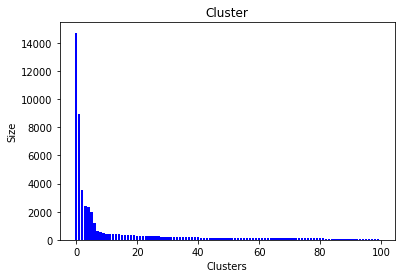

In [19]:
print("biggest 20 clusters")
print(clusters.cluster_id.value_counts().head(20))
print(clusters.cluster_id.value_counts().values)


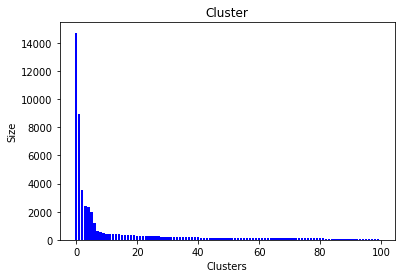

In [29]:
import matplotlib.pyplot as plt
X = clusters.cluster_id.value_counts().head(100).values
def plot_bar_x(X):
    # this is for plotting purpose
    index = range(len(X))
    plt.bar(x=index, height=X, color="blue")
    plt.xlabel('Clusters')
    plt.ylabel('Size')
    plt.title('Cluster')
    plt.show()

plot_bar_x(X) 


# Read checkins

In [31]:
import pandas as pd

checkins_file = "/home/skutukov/datasets/temp/Gowalla_totalCheckins.txt"
checkins = pd.read_csv(checkins_file, sep='\t', header=None)
checkins = checkins.drop(checkins.columns[[1, 2, 3]], axis=1)
checkins.columns = ['user', 'location_id']
print(checkins.head())

   user  location_id
0     0        22847
1     0       420315
2     0       316637
3     0        16516
4     0      5535878


In [32]:
# print(clusters.head())
checkins = checkins.merge(clusters, left_on='user', right_on='user',
                          how='inner')
print(checkins.head())


   user  location_id  cluster_id
0     0        22847         307
1     0       420315         307
2     0       316637         307
3     0        16516         307
4     0      5535878         307


# Calculate top locations


In [34]:

count = 10
def get_top(x):
    top = x.location_id.value_counts().head(count).index.values
    return pd.Series(top)

top_checkins = checkins.groupby('cluster_id').apply(get_top).unstack()


In [35]:
print(top_checkins.shape)
print(top_checkins.head())
top_checkins.shape[0]

(34117, 10)
                   0         1          2         3         4         5  \
cluster_id                                                                
0             9191.0   24650.0    24894.0    8964.0  420315.0  153505.0   
1             9961.0  691005.0  1200646.0  894754.0   26995.0  530972.0   
2           420315.0   17208.0     9371.0   21714.0  887540.0   72530.0   
3            91717.0  703421.0   869843.0  689974.0  124660.0   56902.0   
4           211348.0  102499.0    57155.0  188615.0   53896.0  225674.0   

                    6          7          8         9  
cluster_id                                             
0             21714.0    57155.0   113848.0   19542.0  
1            156695.0  1357197.0  1164333.0   95179.0  
2             16233.0    28221.0   575801.0  755297.0  
3           1250475.0   443999.0  1130695.0  127460.0  
4             40971.0    21194.0   203431.0  152880.0  


34117

In [36]:
test_user_top_chekings = checkins.merge(top_checkins, left_on='cluster_id',
                                             right_on='cluster_id', how='inner')
print(test_user_top_chekings.head())

   user  location_id  cluster_id        0       1       2        3        4  \
0     0        22847         307  19542.0  9410.0  9246.0  10190.0  14470.0   
1     0       420315         307  19542.0  9410.0  9246.0  10190.0  14470.0   
2     0       316637         307  19542.0  9410.0  9246.0  10190.0  14470.0   
3     0        16516         307  19542.0  9410.0  9246.0  10190.0  14470.0   
4     0      5535878         307  19542.0  9410.0  9246.0  10190.0  14470.0   

         5        6        7       8        9  
0  10259.0  55033.0  23256.0  9241.0  22831.0  
1  10259.0  55033.0  23256.0  9241.0  22831.0  
2  10259.0  55033.0  23256.0  9241.0  22831.0  
3  10259.0  55033.0  23256.0  9241.0  22831.0  
4  10259.0  55033.0  23256.0  9241.0  22831.0  


In [37]:
print(test_user_top_chekings.shape[0])

6442892


In [38]:
uniq_clusters = test_user_top_chekings.cluster_id.unique()


In [39]:
clusters_count = {}
clusters_match = {}

for index, row in test_user_top_chekings.iterrows():
    if index % 500000 == 0:
        print(index/test_user_top_chekings.shape[0])
        
    if row.cluster_id in clusters_count:
        clusters_count[row.cluster_id] += 1
    else:
        clusters_count[row.cluster_id] = 1
    location = 0
    isMatch = False
    for i in range(0, 10):
        if row['location_id'] == row[i]:
            isMatch = True
            break
    if isMatch:
        if row.cluster_id in clusters_match:
              clusters_match[row.cluster_id] += 1
        else:
              clusters_match[row.cluster_id] = 1



0.0


0.07760490164975604


0.1552098032995121


0.23281470494926812


0.3104196065990242


0.3880245082487802


0.46562940989853624


0.5432343115482923


0.6208392131980484


0.6984441148478043


0.7760490164975604


0.8536539181473165


0.9312588197970725


## Calculate accuracy for each cluster 

In [41]:

rank = np.zeros_like(uniq_clusters, dtype=float)
for i, u in enumerate(uniq_clusters):
    if u in clusters_match:
        rank[i] = clusters_match[u]/clusters_count[u]
        # print(u, clusters_match[u], clusters_count[u], clusters_match[u]/clusters_count[u],  rank[i])
    else: 
        rank[i] = 0
        # print(rank[i])


##  Mean accuracy of all clusters 


In [42]:

print('mean score', rank.sum()/clusters.shape[0])


mean score 0.11941666004944665


##  Mean accuracy of clusters with positive scores 



In [21]:
print('mean non-zero score ', rank[rank != 0].mean())


mean non-zero score  0.6881097580613995
